In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animat
from matplotlib.animation import FuncAnimation
from scipy.optimize import fsolve

# Zero potential

In [3]:
# Parameters
c = 1.0              # speed of light
L = 100.0             # spatial domain length
T = 200.0             # total time
Nx = 1000             # number of spatial points
Nt = 1000            # number of time steps

dx = L / (Nx - 1) #difference between spatial points
dt = 0.5*T / Nt #time step
r = (c * dt / dx)  #Courant number, it needs to be smaller than 1 
                   #(how much the physical signal shifts 
                   #during one time step relative to the spatial step)

# Stability check
if r > 1.0:
    raise ValueError("Stability condition violated (CFL condition)")

# Spatial grid
x = np.linspace(0, L, Nx)

# Initialize h(x,t) arrays
h = np.zeros((Nt, Nx))

# Initial condition: Gaussian pulse
h[0] = np.exp(-(x - L/2)**2/2)

# First time step (assuming initial velocity = 0)
h[1, 1:-1] = h[0, 1:-1] + 0.5 * r**2 * (h[0, 2:] - 2*h[0, 1:-1] + h[0, :-2])

# Time evolution loop
for n in range(1, Nt-1):
    h[n+1, 1:-1] = 2*h[n, 1:-1] - h[n-1, 1:-1] + r**2 * (h[n, 2:] - 2*h[n, 1:-1] + h[n, :-2])

#Time
time = np.zeros(Nt)
i = 0
while i < Nt:
    time[i]=dt*i
    i = i+1

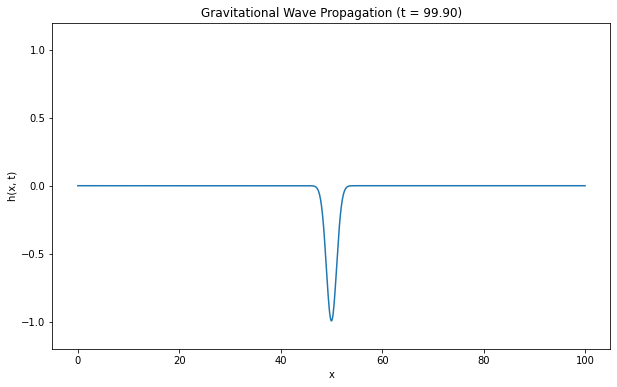

In [4]:
# Plot final wave profile
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x, h[0])

ax.set_xlabel('x')
ax.set_ylabel('h(x, t)')
ax.set_ylim(-1.2, 1.2)
ax.set_title('Gravitational Wave Propagation (t = 0.00)')

def update(frame):
    line.set_ydata(h[frame])
    ax.set_title(f'Gravitational Wave Propagation (t = {frame * dt:.2f})')
    return line,

ani = FuncAnimation(fig, update, frames=Nt, interval=30, blit=True)
ani.save('wave_animation_zero_potential.mp4', writer='ffmpeg', fps=30)
plt.show()

# With non-zero Potential (Step potential/barrier)

In [7]:
import matplotlib
matplotlib.use('TkAgg')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
c = 1.0
L = 100.0
T = 100.0
Nx = 1000
Nt = 1000

dx = L / (Nx - 1)
dt = 0.5 * T / Nt
r = (c * dt / dx)

if r > 1.0:
    raise ValueError("CFL condition violated")

x = np.linspace(0, L, Nx)

# Step potential (barrier between x=50 and x=60)
V = np.zeros(Nx)
V[(x > 50) & (x < 60)] = 1.5  # High potential "wall" between x=50 and x=60

# Initialize h(x,t)
h = np.zeros((Nt, Nx))

# Initial condition: Gaussian pulse shifted left (at x = L/4)
h[0] = np.exp(-((x - L/4)**2) / 2)

# First time step (including potential term)
h[1, 1:-1] = (h[0, 1:-1] +
              0.5 * r**2 * (h[0, 2:] - 2*h[0, 1:-1] + h[0, :-2]) -
              0.5 * (dt**2) * V[1:-1] * h[0, 1:-1])

# Time evolution loop (with potential term)
for n in range(1, Nt-1):
    h[n+1, 1:-1] = (2*h[n, 1:-1] - h[n-1, 1:-1] +
                    r**2 * (h[n, 2:] - 2*h[n, 1:-1] + h[n, :-2]) -
                    (dt**2) * V[1:-1] * h[n, 1:-1])

# Time array
time = np.arange(Nt) * dt

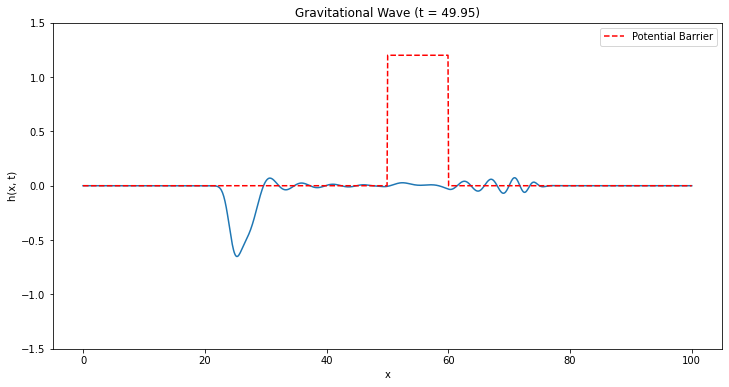

In [8]:
# Animation plot
fig, ax = plt.subplots(figsize=(12, 6))
line, = ax.plot(x, h[0])
ax.set_xlabel('x')
ax.set_ylabel('h(x, t)')
ax.set_ylim(-1.5, 1.5)
ax.set_title('Gravitational Wave Propagation with Potential Barrier')

# Potential plot
ax.plot(x, V / np.max(V) * 1.2, 'r--', label='Potential Barrier')
ax.legend()

def update(frame):
    line.set_ydata(h[frame])
    ax.set_title(f'Gravitational Wave (t = {frame * dt:.2f})')
    return line,

ani = FuncAnimation(fig, update, frames=Nt, interval=30, blit=True)
ani.save('wave_animation_barrier.mp4', writer='ffmpeg', fps=30)
plt.show()

# Regge-Wheeler Potential (plot)

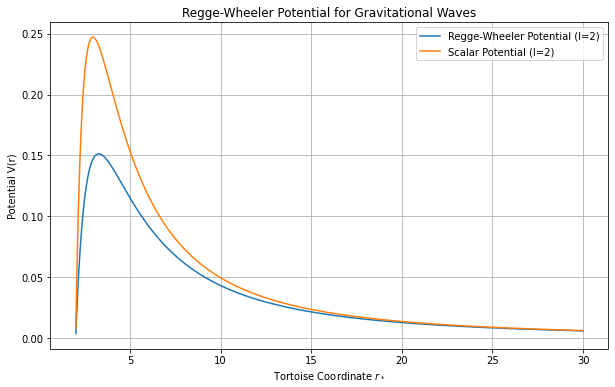

In [9]:
# Parameters
M = 1.0
l = 2

# Radial coordinate r (from outside the horizon to large r)
r = np.linspace(2.01 * M, 30 * M, 1000)

# Regge-Wheeler potential V(r)
V = (1 - 2*M/r) * (l*(l+1) / r**2 - 6*M/r**3) 

V2 = (1 - 2*M/r) * (l*(l+1) / r**2 + 2*M/r**3) 

# Tortoise coordinate r_star
r_star = r + 2*M * np.log(r/(2*M) - 1)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(r, V, label=f'Regge-Wheeler Potential (l={l})')
plt.plot(r, V2, label=f'Scalar Potential (l={l})')
plt.xlabel('Tortoise Coordinate $r_*$')
plt.ylabel('Potential V(r)')
plt.title('Regge-Wheeler Potential for Gravitational Waves')
plt.grid(True)
plt.legend()
plt.show()

# Regge-Wheeler Potential

/tmp/ipykernel_10780/80661145.py:24: RuntimeWarning: invalid value encountered in log
  return fsolve(lambda r: r + 2*M * np.log(r/(2*M) - 1) - r_star, r_guess)
/home/vesna/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


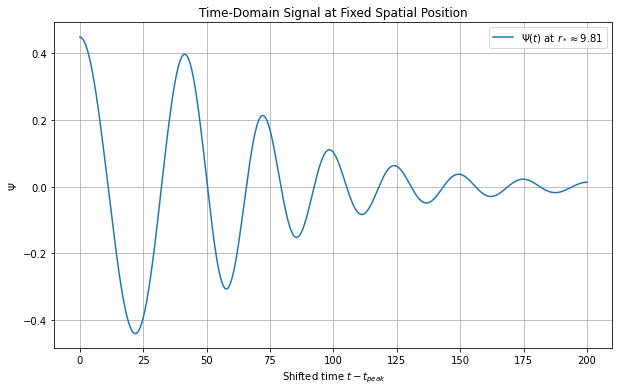

In [18]:
# Constants
M = 1.0                 # Mass of black hole
l = 2                   # Multipole index
c = 1.0                 # Speed of light
L = 1000.0               # Spatial domain length in tortoise coordinate (r*)
T = 200.0               # Total time
Nx = 1000               # Number of spatial points
Nt = 1000               # Number of time steps

dx = L / (Nx - 1)
dt = 0.5 * T / Nt
r = c * dt / dx         # CFL number

# Stability check
if r > 1.0:
    raise ValueError("Stability condition violated (CFL condition)")

# Tortoise coordinate grid
r_star = np.linspace(-200, 200, Nx)

# Schwarzschild radial coordinate r from r*
def r_from_rstar(r_star, M):
    r_guess = 2*M + 1e-5
    return fsolve(lambda r: r + 2*M * np.log(r/(2*M) - 1) - r_star, r_guess)

r_vals = np.array([r_from_rstar(rs, M)[0] for rs in r_star])

# Regge–Wheeler potential V(r)
V = (1 - 2*M / r_vals) * (l*(l+1) / r_vals**2 + 2*M / r_vals**3)

# Initialize wavefunction h(x,t)
h = np.zeros((Nt, Nx))

# Initial condition: Gaussian pulse centered at r* = 0
h[0] = 0.5*np.exp(-(r_star-15)**2 / 250)

# First time step (zero initial velocity)
h[1, 1:-1] = h[0, 1:-1] + 0.5 * r**2 * (h[0, 2:] - 2*h[0, 1:-1] + h[0, :-2]) \
            - 0.5 * dt**2 * V[1:-1] * h[0, 1:-1]


# Boundary conditions for first time step
# Left boundary (ingoing at r* = -∞)
h[1, 0] = h[0, 0] - r * (h[0, 1] - h[0, 0])  #maybe minus sign

# Right boundary (outgoing at r* = infinity)
h[1, -1] = h[0, -1] + r * (h[0, -2] - h[0, -1])

# Time evolution
for n in range(1, Nt - 1):
    # Interior update
    h[n+1, 1:-1] = (2*h[n, 1:-1] - h[n-1, 1:-1] +
                   r**2 * (h[n, 2:] - 2*h[n, 1:-1] + h[n, :-2]) -
                   dt**2 * V[1:-1] * h[n, 1:-1])
   
    # Applying boundary conditions
    # Ingoing at left boundary (horizon)
    h[n+1, 0] = h[n-1, 0] + r * (h[n, 1] - h[n, 0])
   
    # Outgoing at right boundary (infinity)
    h[n+1, -1] = h[n-1, -1] + r * (h[n, -2] - h[n, -1])

# Time array
time = np.linspace(0, T, Nt)

# Plot snapshot
#plt.figure(figsize=(10, 6))
#plt.plot(r_star, h[500], label='Wave profile at t = {:.2f}'.format(time[500]))
#plt.xlabel('Tortoise coordinate $r_*$')
#plt.ylabel('$\Psi(r_*, t)$')
#plt.title('Regge–Wheeler Equation Wave Evolution (l = {})'.format(l))
#plt.grid(True)
#plt.legend()
#plt.show()

r_star_probe = 10 
probe_index = np.argmin(np.abs(r_star - r_star_probe))  # Finds closest index

# Extract wave signal at that location over time
signal = h[:, probe_index]

# t_peak
t_peak_index = np.argmax(np.abs(signal))
t_peak = time[t_peak_index]

# Define shifted time
t_shifted = time - t_peak

# Plot the time-domain signal
plt.figure(figsize=(10, 6))
plt.plot(time-t_peak, signal, label=f'$\\Psi(t)$ at $r_* \\approx {r_star[probe_index]:.2f}$')
plt.xlabel('Shifted time $t - t_{peak}$')
plt.ylabel('$\\Psi$')
plt.title('Time-Domain Signal at Fixed Spatial Position')
plt.grid(True)
plt.legend()
plt.show()

### TODO: Prevent fsolve from sampling r <= 2M (log singularity at the horizon).

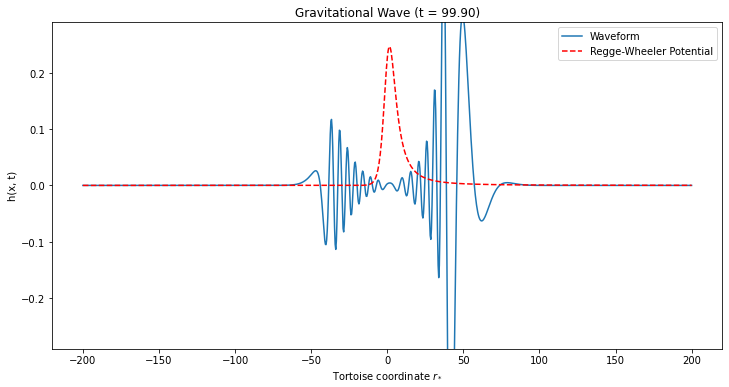

In [19]:
# Animation plot
fig, ax = plt.subplots(figsize=(12, 6))
line, = ax.plot(r_star, h[0],  label='Waveform')
ax.set_xlabel('Tortoise coordinate $r_*$')
ax.set_ylabel('h(x, t)')
ax.set_ylim(-0.29, 0.29)
ax.set_title('Gravitational Wave Propagation with Potential Barrier')

# Plot the potential for visualization (scaled)
ax.plot(r_star, V, 'r--', label='Regge-Wheeler Potential')
ax.legend()

def update(frame):
    line.set_ydata(h[frame])
    ax.set_title(f'Gravitational Wave (t = {frame * dt:.2f})')
    return line,

ani = FuncAnimation(fig, update, frames=Nt, interval=30, blit=True)
ani.save('wave_animation_RW.mp4', writer='ffmpeg', fps=50)
plt.show()

# Fitting the quasi-normal modes

Fitted QNM Parameters:
A0     = 9.1181e-01
tau0   = 48.4328
omega0 = 0.2006
phi0   = 5.8888


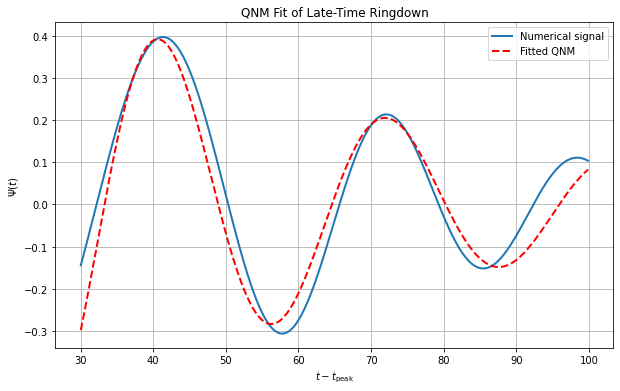

In [38]:
from scipy.optimize import curve_fit

# t_peak
t_peak_index = np.argmax(np.abs(signal))
t_peak = time[t_peak_index]

# shifted time
t_shifted = time - t_peak

# Extracting late-time window for QNM fitting
fit_mask = (t_shifted > 30) & (t_shifted < 100)
t_fit = t_shifted[fit_mask]
signal_fit = signal[fit_mask]

# damped sinusoid function
def damped_sinusoid(t, A0, tau0, omega0, phi0):
    return A0 * np.exp(-t / tau0) * np.sin(omega0 * t + phi0)

# initial parameter guesses:
A0_guess = 0.2
tau0_guess = 12.0
omega0_guess = 0.37
phi0_guess = 0.0
p0 = [A0_guess, tau0_guess, omega0_guess, phi0_guess]

bounds = (
    [0,  1e-3,  0.0,   -2*np.pi],   # lower bounds
    [1.0, 200.0, 1.0,  2*np.pi]     # upper bounds
)

# Fiting (using curve_fit)
params, covariance = curve_fit(damped_sinusoid, t_fit, signal_fit, p0=p0, bounds=bounds)
A0, tau0, omega0, phi0 = params

# Results
print(f"Fitted QNM Parameters:")
print(f"A0     = {A0:.4e}")
print(f"tau0   = {tau0:.4f}")
print(f"omega0 = {omega0:.4f}")
print(f"phi0   = {phi0:.4f}")

# SPlotting
plt.figure(figsize=(10, 6))
plt.plot(t_fit, signal_fit, label='Numerical signal', lw=2)
plt.plot(t_fit, damped_sinusoid(t_fit, *params), 'r--', label='Fitted QNM', lw=2)
plt.xlabel('$t - t_{\\mathrm{peak}}$')
plt.ylabel('$\\Psi(t)$')
plt.title('QNM Fit of Late-Time Ringdown')
plt.grid(True)
plt.legend()
plt.show()

### TO DO:
- We can see degeneracy becouse we used only sine model, we should in future add cos function
- For Schwarzschild $l$ = 2, $M$=1, we should expect $\tau$ around 11, but we are getting value around 48, but we can see that our fit isnt that good :(